<a href="https://colab.research.google.com/github/KashyapTimbadiya/CE146_ML_Labs/blob/main/ML_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Labwork**

In [11]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

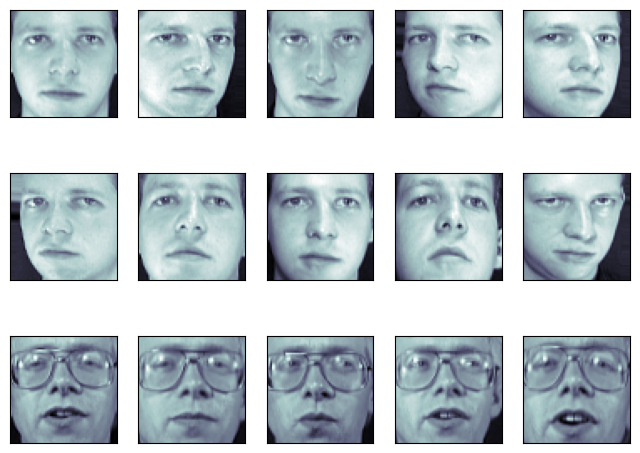

In [12]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)
print("ACCURACY BEFORE PCA",accuracy_score(y_test,gnb_pred))

(300, 4096) (100, 4096)
ACCURACY BEFORE PCA 0.78


In [14]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

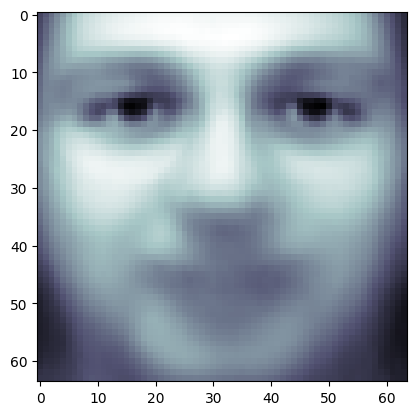

In [15]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)



In [16]:
print(pca.components_.shape)

(150, 4096)


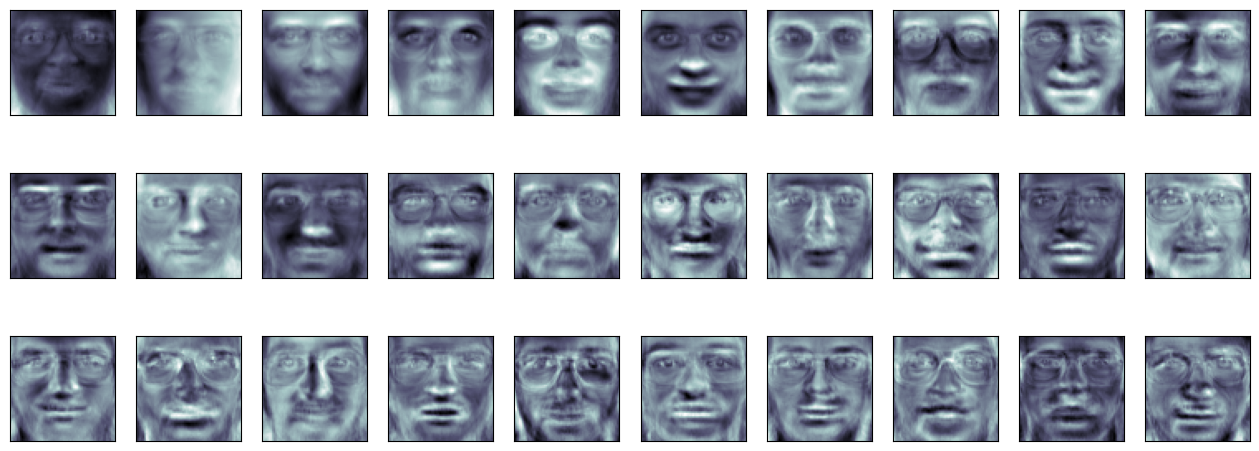

In [17]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

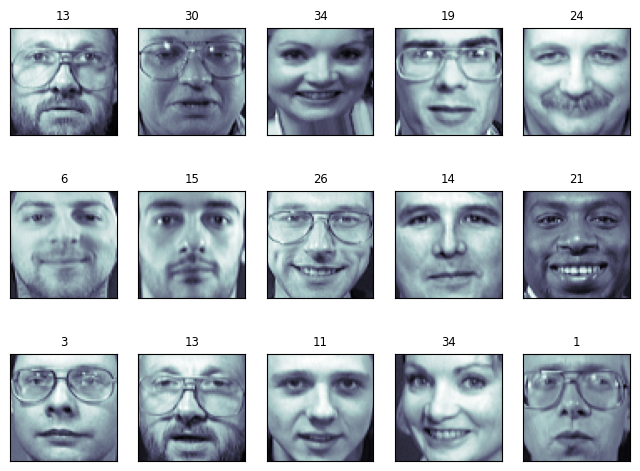

In [20]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)
  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [21]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       1.00      0.50      0.67         2
           3       0.09      1.00      0.17         1
           4       1.00      1.00      1.00         1
           5       1.00      0.60      0.75         5
           6       1.00      0.75      0.86         4
           7       1.00      0.67      0.80         3
           9       0.20      1.00      0.33         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [22]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [23]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


# **Exercise**

In [8]:
#Q1) Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df=fetch_olivetti_faces()
X=df.data
y=df.target

def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  gnb_pred=gnb.predict(X_test)
  return accuracy_score(y_test,gnb_pred)
  pass
def dt_classify(X_train,X_test,y_train,y_test):
  dt=DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  dt_pred=dt.predict(X_test)
  return accuracy_score(y_test,dt_pred)
  pass
def svm_classify(X_train,X_test,y_train,y_test):
  svm=SVC()
  svm.fit(X_train,y_train)
  svm_pred=svm.predict(X_test)
  return accuracy_score(y_test,svm_pred)
  pass

def pipe_classify(X_train,X_test,y_train,y_test,models):
  pipe_model=Pipeline(models)
  pipe_model.fit(X_train,y_train)
  pipe_pred=pipe_model.predict(X_test)
  return accuracy_score(y_test,pipe_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print("before pca : ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)

print("gnb_accuracy : ",gnb_accuracy)
print("svm_accuracy : ",svm_accuracy)

pca=PCA(n_components=150,whiten=True)
pca.fit(X_train)

X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)
print("after pca : ")
print("gnb_accuracy : ",gnb_accuracy)
print("svm_accuracy : ",svm_accuracy)
models=[('scaler', StandardScaler()),('svc', SVC())]



before pca : 
gnb_accuracy :  0.7875
svm_accuracy :  0.825
after pca : 
gnb_accuracy :  0.7875
svm_accuracy :  0.8375


In [9]:
#2. Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal omponents. Choose different pairs of principal components and note down your observations
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df=load_iris()
X=df.data
y=df.target

def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  gnb_pred=gnb.predict(X_test)
  return accuracy_score(y_test,gnb_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=146)

print("before pca : ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
print("gnb_accuracy : ",gnb_accuracy)

pca=PCA(n_components=2)
pca.fit(X_train)


X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

print("after pca : X_test : ",X_test)

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
print("after pca : ");
print("gnb_accuracy : ",gnb_accuracy)



before pca : 
gnb_accuracy :  0.9333333333333333
after pca : X_test :  [[-0.11433278 -0.69251401]
 [-2.33467541  0.39914338]
 [-2.23459063  0.38092141]
 [ 1.6514733  -0.55666892]
 [ 1.45776294 -0.29655706]
 [-2.43290543  0.63459137]
 [ 0.99584805 -0.19466726]
 [ 3.55802867  1.16104214]
 [ 2.98519187  0.7659774 ]
 [ 0.11972099 -0.59626562]
 [-2.51628151  0.21864875]
 [ 0.31078215 -0.34525157]
 [ 0.42851285 -0.51767397]
 [ 1.16555602  0.26972146]
 [ 0.53619792 -0.68260255]
 [ 1.02298684 -0.55762651]
 [ 1.45136415 -0.43423123]
 [-2.43119345 -0.15649872]
 [ 0.65427528 -0.49704752]
 [-2.69784755  0.25250215]
 [ 0.40261564 -0.22474745]
 [ 1.54097296  0.49044602]
 [ 1.9652563   0.10069009]
 [ 2.20845853  0.12382852]
 [ 1.16435226  0.06047595]
 [ 0.21069737 -0.3270296 ]
 [-2.75102633 -0.09992819]
 [ 1.87617249 -0.23059817]
 [ 1.26515362 -0.62116776]
 [ 1.41065081  0.23080767]]
after pca : 
gnb_accuracy :  0.8333333333333334


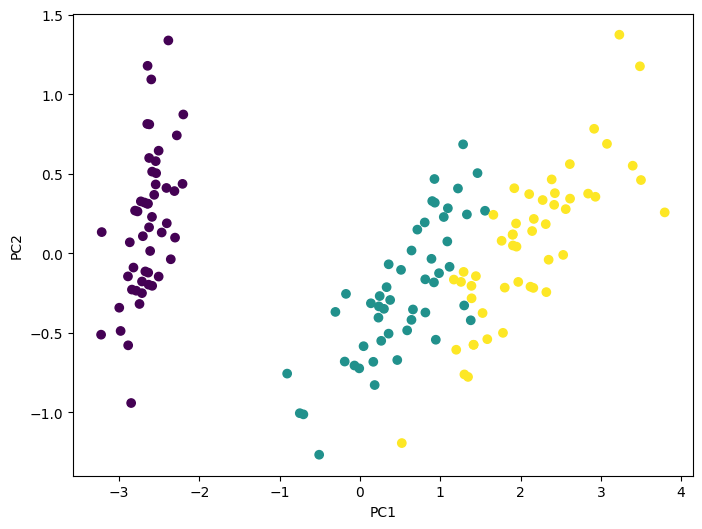

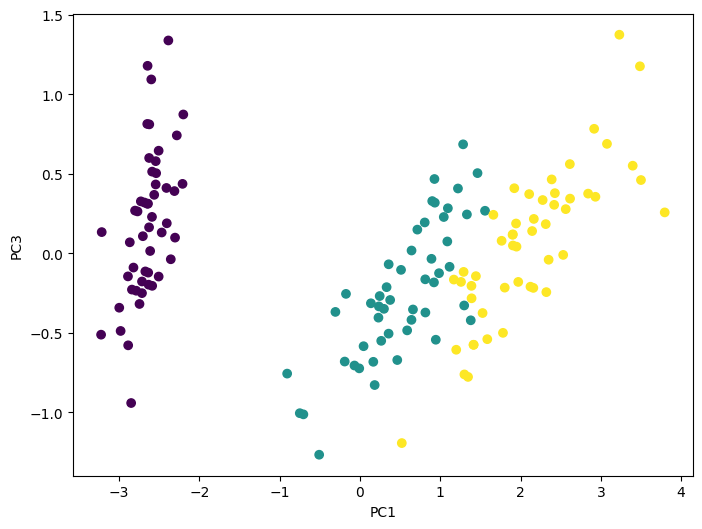

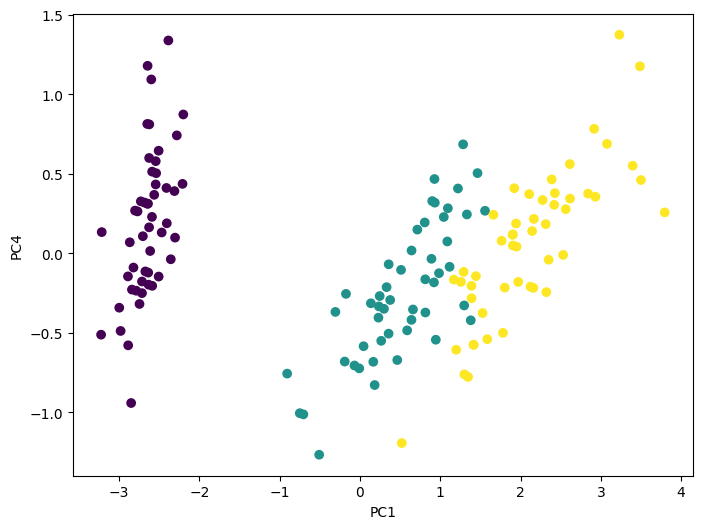

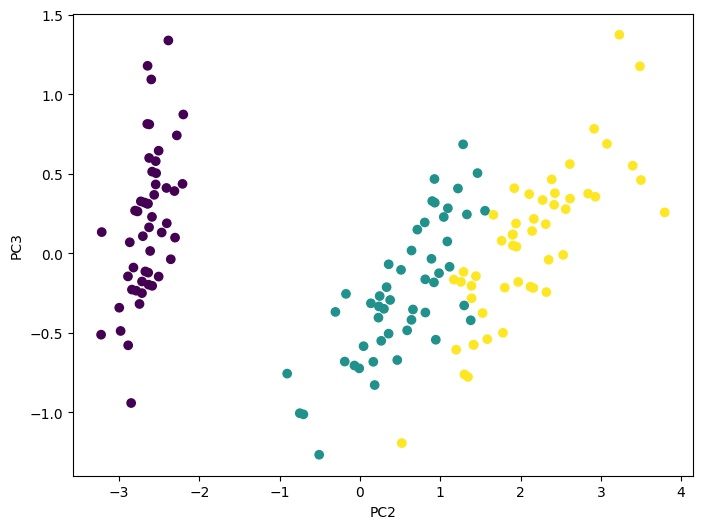

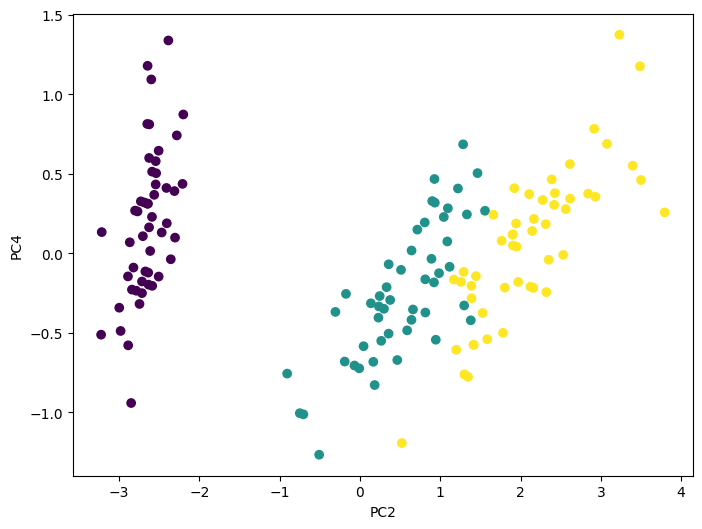

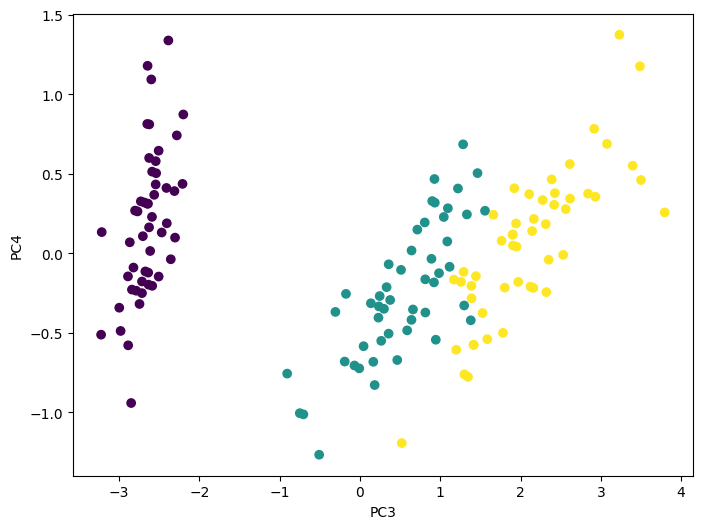

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC2')
plt.ylabel('PC4')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()


In [6]:
#3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate precision and recall of the system.
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
df=load_iris()
X=df.data
y=df.target

def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  
  gnb_pred=gnb.predict(X_test)
  print("classifcation report : ")
  print(classification_report(y_test,gnb_pred))
  print(confusion_matrix(y_test,gnb_pred))
  return accuracy_score(y_test,gnb_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=146)

print("before pca : ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
print("gnb_accuracy : ",gnb_accuracy)

pca=PCA(n_components=2)
pca.fit(X_train)


X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

print("after pca : X_test : ",X_test)

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
print("after pca : ")
print("gnb_accuracy : ",gnb_accuracy)



before pca : 
classifcation report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.94        26
           2       0.86      1.00      0.93        19

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.96        60
weighted avg       0.96      0.95      0.95        60

[[15  0  0]
 [ 0 23  3]
 [ 0  0 19]]
gnb_accuracy :  0.95
after pca : X_test :  [[-0.03991161 -0.7085835 ]
 [-2.25519022  0.39535285]
 [-2.15469889  0.37543209]
 [ 1.72413904 -0.58839173]
 [ 1.53293912 -0.32875665]
 [-2.35204029  0.62851907]
 [ 1.07297416 -0.21968673]
 [ 3.64131974  1.11853658]
 [ 3.06533609  0.72725367]
 [ 0.19450725 -0.61446886]
 [-2.43755127  0.21310502]
 [ 0.3871472  -0.36559224]
 [ 0.50323906 -0.54049285]
 [ 1.24397916  0.2415503 ]
 [ 0.61036802 -0.70703028]
 [ 1.09811858 -0.57548297]
 [ 1.5265835  -0.46316212]
 [-2.35410048 -0.16034761]
 [ 0.72839606 -

In [7]:
#4. Replace Naive Bayes Classifier with Decision Tree Classifier and then Support Vector Machine and compare performance of all three of them.
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df=load_iris()
X=df.data
y=df.target



def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  gnb_pred=gnb.predict(X_test)
  # print(gnb_pred)
  return accuracy_score(y_test,gnb_pred)
  pass
def dt_classify(X_train,X_test,y_train,y_test):
  dt=DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  dt_pred=dt.predict(X_test)
  return accuracy_score(y_test,dt_pred)
  pass
def svm_classify(X_train,X_test,y_train,y_test):
  svm=SVC()
  svm.fit(X_train,y_train)
  svm_pred=svm.predict(X_test)
  return accuracy_score(y_test,svm_pred)
  pass

def pipe_classify(X_train,X_test,y_train,y_test,models):
  pipe_model=Pipeline(models)
  pipe_model.fit(X_train,y_train)
  pipe_pred=pipe_model.predict(X_test)
  return accuracy_score(y_test,pipe_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=146)

print("before pca : ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
dt_accuracy=dt_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)

print("gnb_accuracy : ",gnb_accuracy)
print("dt_accuracy : ",dt_accuracy)
print("svm_accuracy : ",svm_accuracy)

pca=PCA(n_components=2)
pca.fit(X[:,0:2])
X_train=pca.transform(X_train[:,0:2])
X_test=pca.transform(X_test[:,0:2])

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
dt_accuracy=dt_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)

print("after pca : ")

print("gnb_accuracy : ",gnb_accuracy)
print("dt_accuracy : ",dt_accuracy)
print("svm_accuracy : ",svm_accuracy)






before pca : 
gnb_accuracy :  0.9555555555555556
dt_accuracy :  0.9777777777777777
svm_accuracy :  0.9777777777777777
after pca : 
gnb_accuracy :  0.7777777777777778
dt_accuracy :  0.6666666666666666
svm_accuracy :  0.6888888888888889
